In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from dateutil.relativedelta import relativedelta

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


#direct to where the files are downloaded
path =r"C:\Users\heather\Desktop\Post Kaiser Projects\SRTR\data"
os.chdir(path)

In [35]:
releasedates = ['2015-12-16', '2016-06-16', '2017-01-04', '2017-07-05', 
                '2018-01-04','2018-10-08', '2019-01-06', '2019-07-07',
                '2020-01-06', '2020-08-03']

cohortend1m = [ '2014-12-31', '2015-06-30', '2015-12-31', '2016-06-30',
              '2016-12-31','2017-06-30','2017-12-31','2018-06-30',
               '2018-12-31', '2019-06-30']

cohortend1y =[   '2014-12-31', '2015-06-30', '2015-12-31', '2016-06-30',
              '2016-12-31','2017-06-30','2017-12-31','2018-06-30',
              '2018-12-31', '2019-06-30']

cohortend3y =[   '2012-06-30','2012-12-31','2013-06-30','2013-12-31',
             '2014-06-30','2014-12-31','2015-06-30','2015-12-31',
             '2016-03-30', '2016-12-31']

filecode = ['1512', '1606',  '1701', '1707','1711', '1808', '1811', '1905', '1911', '2006'  ]

In [37]:
dates = pd.DataFrame(
{
    'Release Date':pd.to_datetime(releasedates),
    'Cohort End 1 M' :pd.to_datetime(cohortend1m),
    'Cohort End 1 Y': pd.to_datetime(cohortend1y),
    'Cohort End 3 y':pd.to_datetime(cohortend3y),
    'File Code':filecode
})

dates

,Release Date,Cohort End 1 M,Cohort End 1 Y,Cohort End 3 y,File Code
0,2015-12-16,2014-12-31,2014-12-31,2012-06-30,1512
1,2016-06-16,2015-06-30,2015-06-30,2012-12-31,1606
2,2017-01-04,2015-12-31,2015-12-31,2013-06-30,1701
3,2017-07-05,2016-06-30,2016-06-30,2013-12-31,1707
4,2018-01-04,2016-12-31,2016-12-31,2014-06-30,1711
5,2018-10-08,2017-06-30,2017-06-30,2014-12-31,1808
6,2019-01-06,2017-12-31,2017-12-31,2015-06-30,1811
7,2019-07-07,2018-06-30,2018-06-30,2015-12-31,1905
8,2020-01-06,2018-12-31,2018-12-31,2016-03-30,1911
9,2020-08-03,2019-06-30,2019-06-30,2016-12-31,2006


In [4]:

def Scraper (organlist, filelist, columnslist, sheet, df_name):
    for organ in organlist:
        for file in filelist:
            df = pd.read_excel(file+ organ + ".xls", sheet_name =sheet)
            df.columns = df.columns.str.strip()
            df2 = df[columnslist]
            df2 = df2.iloc[1:]
            df2.CTR_CD = df2.CTR_CD.str.strip()
            df_name = pd.concat([df_name, df2])
    return df_name




# are these necessary or just account for kaiser's weirdness?
#Do all of the KP options and expand?
def KPScraper(organlist, filelist, columnslist, sheet, df_name):
    for organ in organlist:
        for file in filelist:
            df = pd.read_excel(file+organ+".xls", sheet_name=sheet)
            df.columns = df.columns.str.strip()
            df2=df[columnslist]
            df2=df[(df2['ORGAN_TYPE']=='SPK')]
            df_name = pd.concate([df_name, df2])
            df_name['ORG']=='KP'
    return df_name


def PAScraper(organlist, filelist, columnslist, sheet, df_name):
    for organ in organlist:
        for file in filelist:
            df = pd.read_excel(file+organ+".xls", sheet_name=sheet)
            df.columns = df.columns.str.strip()
            df2=df[columnslist]
            df2=df[(df2['ORGAN_TYPE']=='ALL')]
            df_name = pd.concate([df_name, df2])
    return df_name.drop(['ORGAN_TYPE'], axis=1)


In [49]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

In [10]:
organcodes = []

for file in onlyfiles:
    organcodes.append(file[-6:-4])
    
organcodes = list(set(organcodes))    

In [11]:
organcodes

['LU', 'HR', 'IN', 'HL', 'LI', 'PA', 'KP', 'KI']

In [14]:
#first just one organ, one metric

In [55]:
sheetlist = {}




for file in onlyfiles:
    if 'HR' in file:
        #print(file)
        df1 = pd.read_excel(file, sheet_name =None)
        sheetlist[file] = list(df1.keys())
        
sheetlist        

{'csrs_final_tables_1512HR.XLS': ['Table B1',
  'Tables B2-B3 Center',
  'Tables B2-B3 Region',
  'Tables B2-B3 Nation',
  'Tables B4-B5, & Figures B1-B6',
  'Table B6',
  'Table B6 - Pancreas Graft of KP',
  'Table B6 - STATUS 1',
  'Tables B7-B8 Center <=1yr',
  'Tables B7-B8 Center >=2yr',
  'Tables B7-B8 Nation <=1yr',
  'Tables B7-B8 Nation >=2yr',
  'Tables B7-B8 Counts Center',
  'Tables B7-B8 Counts Nation',
  'Table B9',
  'Figures C1-C2 - Deceased',
  'Figures C1-C2 - Deceased Nation',
  'Figures C1-C2 - Living',
  'Figures C1-C2 - Living Nation',
  'Table C3 - Deceased',
  'Table C3 - Living',
  'Table C4 - Deceased',
  'Table C4 - Living',
  'TablesC5-C10 FiguresC1-C12',
  'TablesC5-C10 FiguresC1-C12PA',
  'TablesC5-C10 FiguresC1-C12D',
  'TablesC11-C16 FiguresC13-C24',
  'TablesC11-C16 FiguresC13-C24D'],
 'csrs_final_tables_1606HR.XLS': ['Table B1',
  'Tables B2-B3 Center',
  'Tables B2-B3 Region',
  'Tables B2-B3 Nation',
  'Tables B4-B5, & Figures B1-B6',
  'Table B6',
 

In [59]:
HR = pd.DataFrame()



columnslist = ["center","RELEASE_DATE",'DDTX_RR']
for file in onlyfiles:
    if 'HR' in file:
        if 'Tbls B4-B5 & Fig B1-B6 - All' in sheetlist[file]:
            df = pd.read_excel(file, sheet_name ='Tbls B4-B5 & Fig B1-B6 - All')
            
            df.columns = df.columns.str.strip()
            if 'DDTX_RR' in df.columns:
                df2 = df[columnslist]
                df2 = df2.iloc[1:]
                HR = pd.concat([HR, df2])

In [63]:
HR['code'] = HR['center'].astype(str).str[0:4]

In [86]:
example1 = HR[HR['code']=='CACS']
example1['RELEASE_DATE'] = pd.to_datetime(example1['RELEASE_DATE'])
example1['time code'] = [1,2,3,4,5]
example1["DDTX_RR"]= pd.to_numeric(example1["DDTX_RR"],errors='coerce')
example1

C:\Users\heather\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\heather\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\heather\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,center,RELEASE_DATE,DDTX_RR,code,time code
10,CACSTX1,2018-01-04 18:00:00,1.17,CACS,1
10,CACSTX1,2019-01-06 18:00:00,1.06,CACS,2
10,CACSTX1,2019-07-07 19:00:00,1.02,CACS,3
10,CACSTX1,2020-01-06 18:00:00,1.07,CACS,4
10,CACSTX1,2020-08-03 19:00:00,1.13,CACS,5


In [88]:
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression


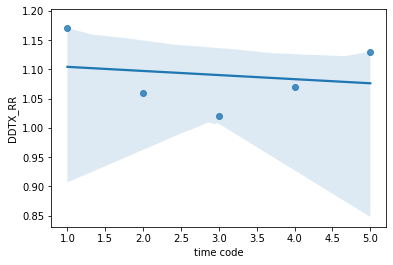

In [85]:
sns.regplot(x="time code", y="DDTX_RR", data=example1);

In [91]:
regsr=LinearRegression()
X = np.array(example1["time code"]).reshape(-1,1)
y = np.array(example1["DDTX_RR"]).reshape(-1,1)
print("X=")
print(X)
print("y=")
print(y)


X=
[[1]
 [2]
 [3]
 [4]
 [5]]
y=
[[1.17]
 [1.06]
 [1.02]
 [1.07]
 [1.13]]


In [93]:
to_predict_x= [6,7,8]
to_predict_x= np.array(to_predict_x).reshape(-1,1)

In [94]:
regsr=LinearRegression()
regsr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
predicted_y= regsr.predict(to_predict_x)
m= regsr.coef_
c= regsr.intercept_
print("Predicted y:\n",predicted_y)
print("slope (m): ",m)
print("y-intercept (c): ",c)

Predicted y:
 [[1.069]
 [1.062]
 [1.055]]
slope (m):  [[-0.007]]
y-intercept (c):  [1.111]


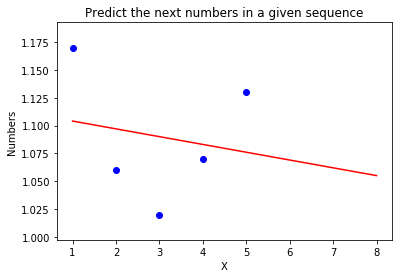

In [96]:

%matplotlib inline
plt.title('Predict the next numbers in a given sequence')  
plt.xlabel('X')  
plt.ylabel('Numbers') 
plt.scatter(X,y,color="blue")
new_y=[ m*i+c for i in np.append(X,to_predict_x)]
new_y=np.array(new_y).reshape(-1,1)
plt.plot(np.append(X,to_predict_x),new_y,color="red")
plt.show()

In [ ]:
#WL volume over time? 
#https://machinelearningmastery.com/make-predictions-time-series-forecasting-python/